# Shopping Decision Making

In [32]:
import pandas as pd

# Data Cleaning
The first step is to clean the data set.

In [33]:
data = pd.read_csv('shopping.csv')

The first thing I always do is look at the data to get a sense of it's contents.

In [34]:
data.head()

,age:FLOAT,region:STRING:TreatAsEnumeration,income:FLOAT,education:STRING:TreatAsEnumeration,min_on_site:FLOAT,nr_of_visits:FLOAT,purchase_amount:FLOAT,purchases:FLOAT,mobile:INTEGER:TreatAsEnumeration,ad_campaign_a:INTEGER:TreatAsEnumeration,ad_campaign_b:INTEGER:TreatAsEnumeration,design:STRING:TreatAsEnumeration
0,30.088636,Southwest,40086.602876,2_HS,74.030238,16.313967,248.834877,4.575942,1,1,1,blue
1,63.576213,Southwest,91029.587988,4_Grad,10.403480,11.040852,101.722930,3.108176,0,0,1,blue
2,49.483366,West,108737.447589,4_Grad,27.778082,4.904583,105.588923,1.381233,1,1,1,yellow
3,32.587459,West,29794.743365,4_Grad,21.499583,16.690542,240.259848,4.673685,0,1,1,yellow
4,44.410241,Northeast,39758.176692,4_Grad,30.441823,14.166217,136.772099,1.339034,1,1,0,yellow


The next thing I do is determine how I can decrease the memory required to load the dataset. In this case I am also matching the column types suggested in the column names.

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
age:FLOAT                                   1000 non-null float64
region:STRING:TreatAsEnumeration            1000 non-null object
income:FLOAT                                1000 non-null float64
education:STRING:TreatAsEnumeration         1000 non-null object
min_on_site:FLOAT                           1000 non-null float64
nr_of_visits:FLOAT                          1000 non-null float64
purchase_amount:FLOAT                       1000 non-null float64
purchases:FLOAT                             1000 non-null float64
mobile:INTEGER:TreatAsEnumeration           1000 non-null int64
ad_campaign_a:INTEGER:TreatAsEnumeration    1000 non-null int64
ad_campaign_b:INTEGER:TreatAsEnumeration    1000 non-null int64
design:STRING:TreatAsEnumeration            1000 non-null object
dtypes: float64(6), int64(3), object(3)
memory usage: 93.9+ KB


In [36]:
data['region:STRING:TreatAsEnumeration'] = data['region:STRING:TreatAsEnumeration'].astype('category')
data['education:STRING:TreatAsEnumeration'] = data['education:STRING:TreatAsEnumeration'].astype('category')
data['mobile:INTEGER:TreatAsEnumeration'] = data['mobile:INTEGER:TreatAsEnumeration'].astype('category')
data['ad_campaign_a:INTEGER:TreatAsEnumeration'] = data['ad_campaign_a:INTEGER:TreatAsEnumeration'].astype('category')
data['ad_campaign_b:INTEGER:TreatAsEnumeration'] = data['ad_campaign_b:INTEGER:TreatAsEnumeration'].astype('category')
data['design:STRING:TreatAsEnumeration'] = data['design:STRING:TreatAsEnumeration'].astype('category')

Note how the memory required to hold the dataset goes down by 43%.

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
age:FLOAT                                   1000 non-null float64
region:STRING:TreatAsEnumeration            1000 non-null category
income:FLOAT                                1000 non-null float64
education:STRING:TreatAsEnumeration         1000 non-null category
min_on_site:FLOAT                           1000 non-null float64
nr_of_visits:FLOAT                          1000 non-null float64
purchase_amount:FLOAT                       1000 non-null float64
purchases:FLOAT                             1000 non-null float64
mobile:INTEGER:TreatAsEnumeration           1000 non-null category
ad_campaign_a:INTEGER:TreatAsEnumeration    1000 non-null category
ad_campaign_b:INTEGER:TreatAsEnumeration    1000 non-null category
design:STRING:TreatAsEnumeration            1000 non-null category
dtypes: category(6), float64(6)
memory usage: 53.7 KB


Next I like to rename column names to simplify them. I like the idea of including the data type but I am personally more comfortable simplifying column names and just calling `pd.info` or `type()` if I need to do a type check.

In [38]:
data.rename(columns=lambda name: name.split(':')[0], inplace=True)

In [39]:
data.columns

Index(['age', 'region', 'income', 'education', 'min_on_site', 'nr_of_visits',
       'purchase_amount', 'purchases', 'mobile', 'ad_campaign_a',
       'ad_campaign_b', 'design'],
      dtype='object')

In [40]:
data.head()

,age,region,income,education,min_on_site,nr_of_visits,purchase_amount,purchases,mobile,ad_campaign_a,ad_campaign_b,design
0,30.088636,Southwest,40086.602876,2_HS,74.030238,16.313967,248.834877,4.575942,1,1,1,blue
1,63.576213,Southwest,91029.587988,4_Grad,10.403480,11.040852,101.722930,3.108176,0,0,1,blue
2,49.483366,West,108737.447589,4_Grad,27.778082,4.904583,105.588923,1.381233,1,1,1,yellow
3,32.587459,West,29794.743365,4_Grad,21.499583,16.690542,240.259848,4.673685,0,1,1,yellow
4,44.410241,Northeast,39758.176692,4_Grad,30.441823,14.166217,136.772099,1.339034,1,1,0,yellow


The next thing I like to do is create a normalized version of the data set.

In [42]:
data_to_normalize = data.copy()
data_to_normalize['region'] = data_to_normalize['region'].cat.codes
data_to_normalize['education'] = data_to_normalize['education'].cat.codes
data_to_normalize['design'] = data_to_normalize['design'].cat.codes

from sklearn import preprocessing

values = data_to_normalize.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
values_scaled = min_max_scaler.fit_transform(values)
normalized_data = pd.DataFrame(values_scaled)


In [44]:
normalized_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.235461,0.75,0.098179,0.333333,0.536150,0.574067,0.678857,0.895190,1.0,1.0,1.0,0.0
1,0.841507,0.75,0.325139,1.000000,0.074216,0.387458,0.272593,0.527323,0.0,0.0,1.0,0.0
2,0.586460,1.00,0.404031,1.000000,0.200356,0.170303,0.283270,0.094500,1.0,1.0,1.0,1.0
3,0.280684,1.00,0.052327,1.000000,0.154774,0.587393,0.655176,0.919687,0.0,1.0,1.0,1.0
4,0.494648,0.25,0.096716,1.000000,0.219695,0.498061,0.369385,0.083924,1.0,1.0,0.0,1.0


# Assumptions
Looking at the data set I have a few questions, I would normailly ask for clarification but for the sake of this analysis I will make a couple assumptions
1. All patients saw both ad compaigns
2. The ultimate goal is to understand how we can get people to increase there purchase amount, not their number of purchases

# Notes
Here are some additional notes that are guiding my thinking process
1. The data set is too small to do anything with neural networks and deep learning
2. I'm sure there is a good reason for it but I would want to know how number of purchases is a float and not an integer

# Analysis 1: Covariance Matrix
The first thing I like to do when dealing with a data set of this size is to create a full covariance matrix visualization to better understand the covariance between all variate pairs. This is because you can begin to form many preliminary conclusions. Granted, it is not very useful for categorical data.

In [46]:
import seaborn as sns

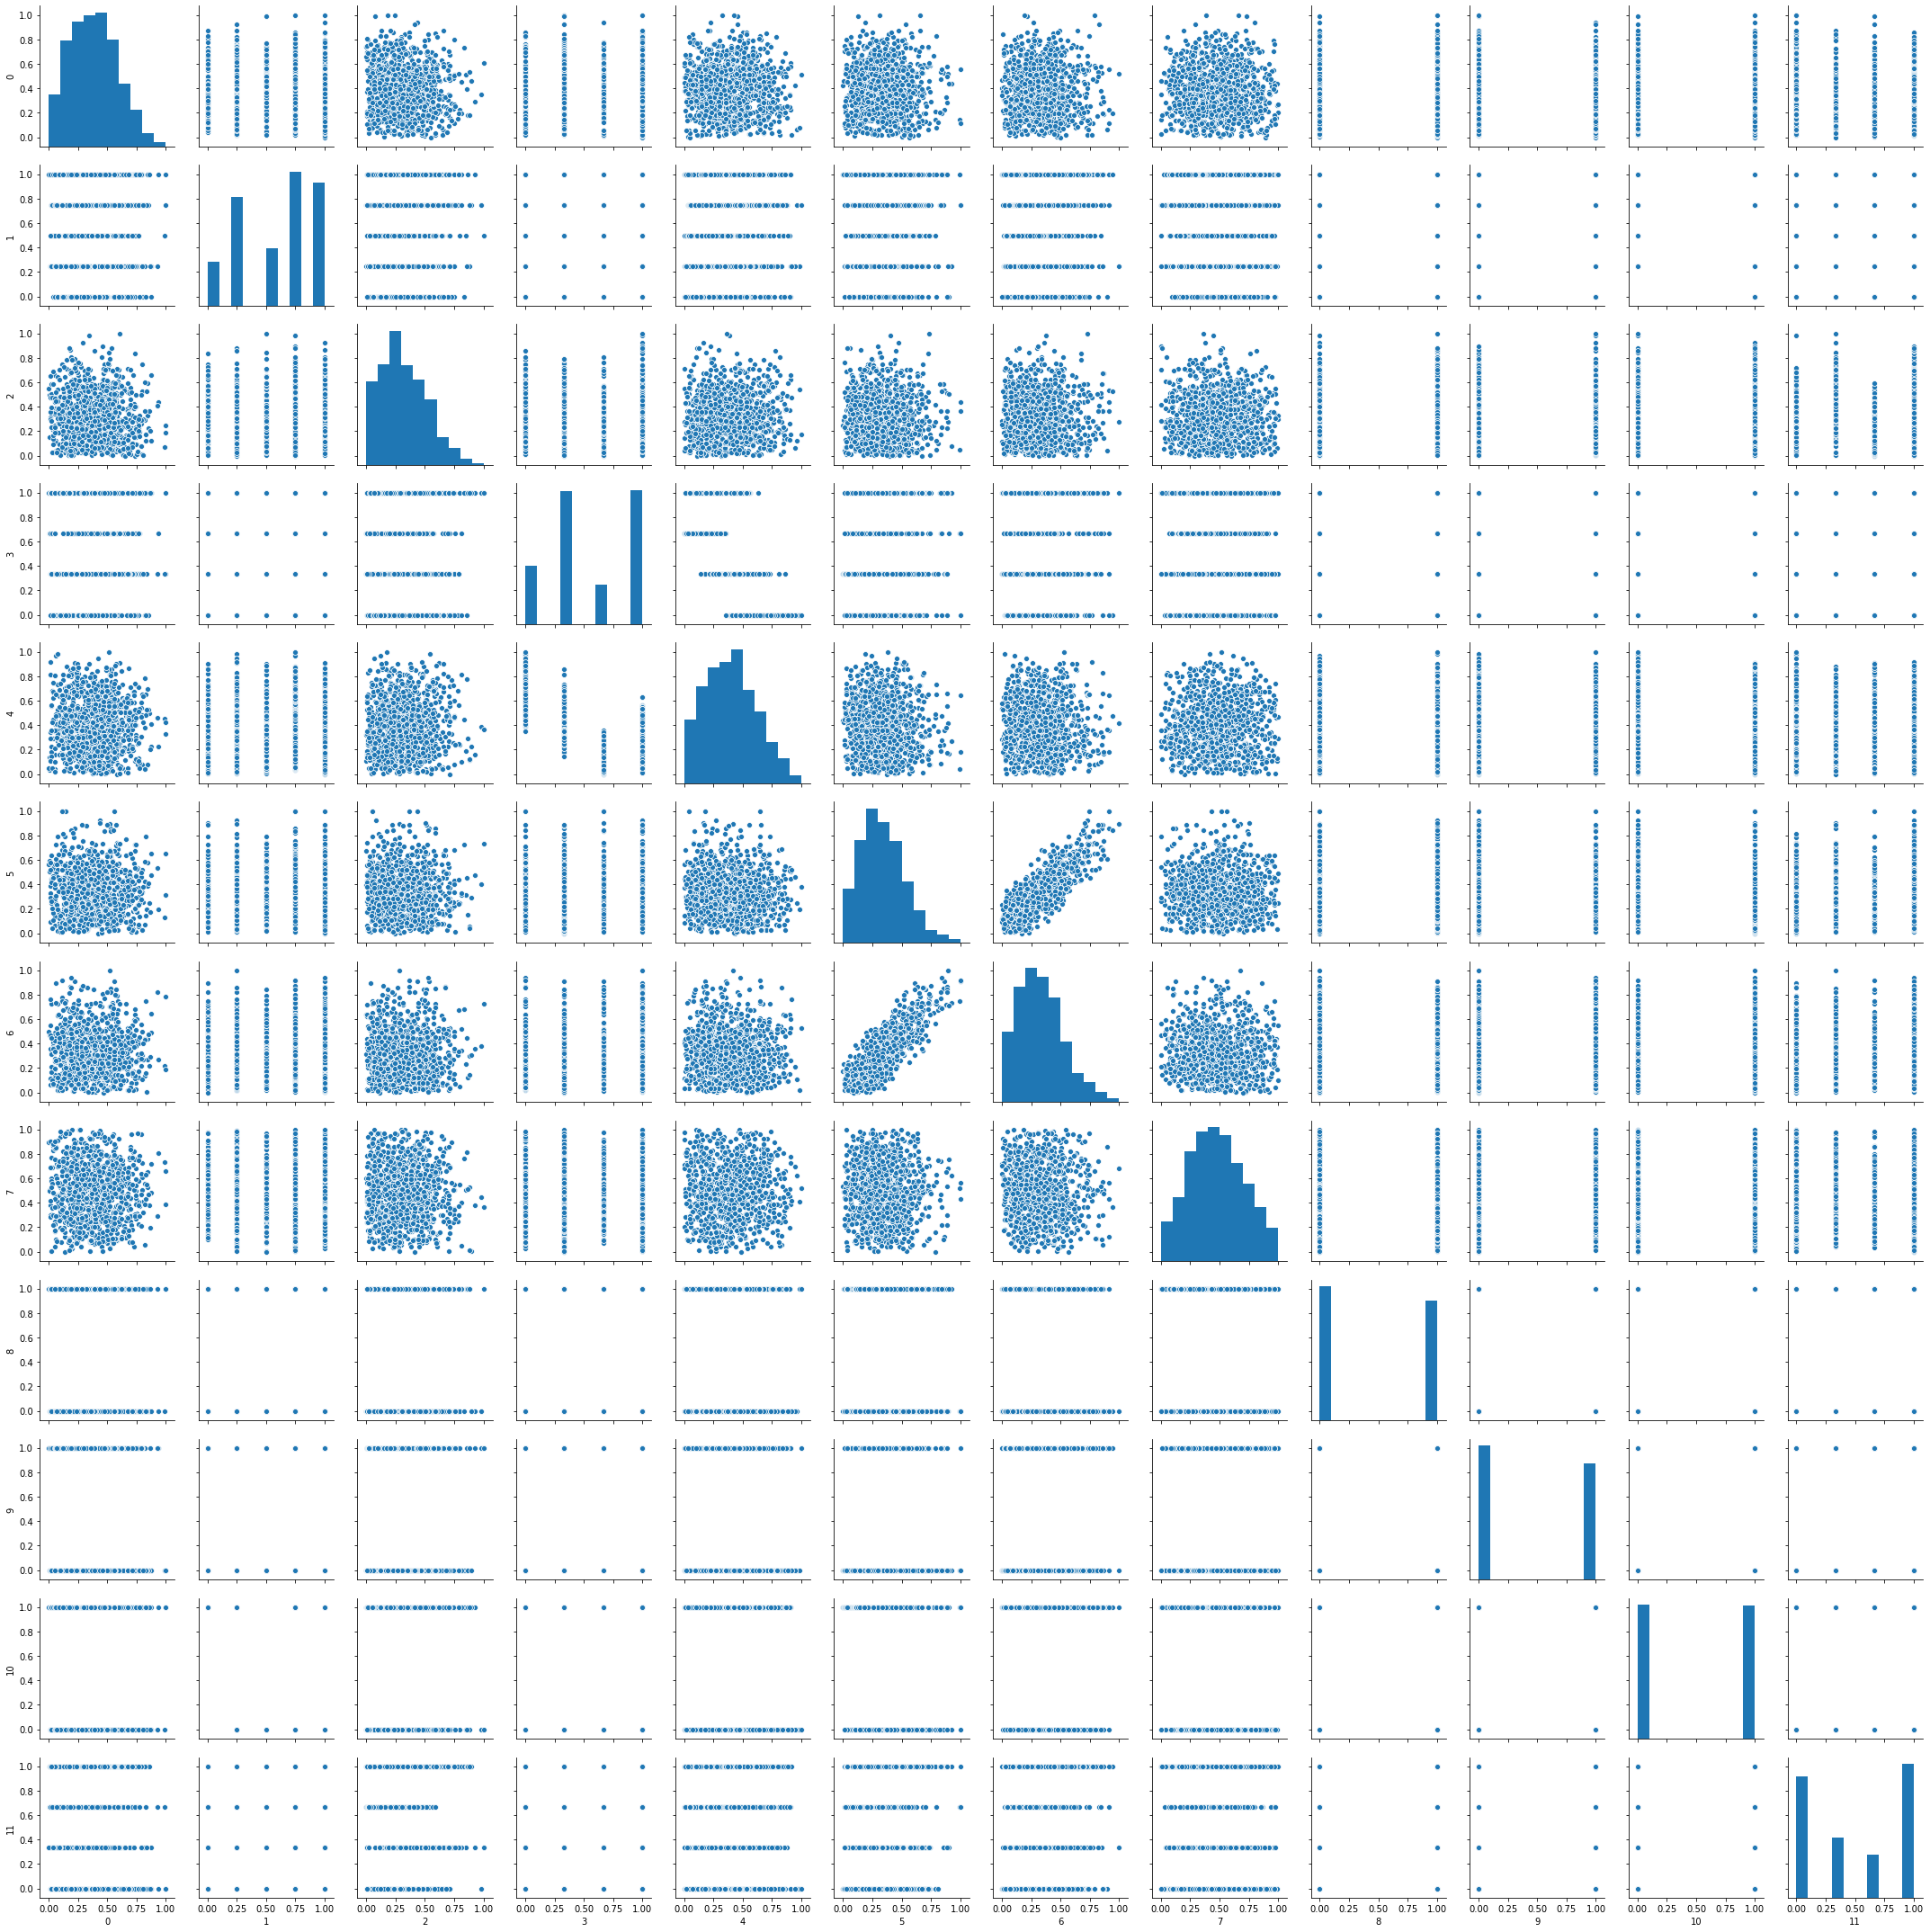

In [47]:
covariance_matrix = sns.pairplot(normalized_data)

## Conclusions
CONCLUSION: There isn't much covariance between any continuous variable pairs except for the number of visits a person makes to the website and the amount of money they spend on purchases.

CONCLUSION: This suggests that neither age nor income are a good predictor of how much money a person would spend on the website.

CONCLUSION: It is suprising to me but there doesn't seem to be much a correlation between the number of purchases someone makes and the amount of money they spend on purchases. It would be a mistake to make that assumption when doing analyses.

# Future Work
- Analyze covariance of the categorical and binary variables using other techniques
    - For example for purchase amount specifically, for each categorical variable, map the distributions of purchase amount for each category and analyze whether or not there are differences in those distributions.
- Since neither age nor income are good predictors of purchase amount, I would focus my time on looking at the effects the advertisement campaigns and website designs had on purchase amount.

# Other Considerations
- I would also be interested in looking at the data sets that include the individuals who visited the website and/or saw the ad campaigns and yet didn't purchase anything.